# 0. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [3]:
#pd.set_option('display.max_rows', None)

# 1. Load Data

In [4]:
#data_online = pd.read_csv("./Data/Online.csv")
#data_transaction = pd.read_csv("./Data/transaction.csv")
#data_customer = pd.read_csv("./Data/Customer.csv")
#data_product = pd.read_csv("./Data/Product.csv")
data_merged = pd.read_csv("./Data/merged_onilne_df.csv")

In [6]:
data_merged.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,min,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
0,1,1,1,0,A01,20190911,16:14,11880,NaN,과일선물세트,...,14,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
1,1,1,2,0,A01,20190911,16:15,22432,NaN,과일선물세트 백화점,...,15,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
2,1,1,3,0,A01,20190911,16:15,36140,NaN,과일바구니,...,15,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
3,1,2,1,0,A01,20190922,14:09,41584,NaN,초등가을잠바,...,9,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
4,1,2,2,0,A01,20190922,14:10,56113,NaN,초등가을점퍼,...,10,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN


In [7]:
data_merged.columns

Index(['clnt_id', 'sess_id', 'hit_seq', 'action_type', 'biz_unit', 'sess_dt',
       'hit_tm', 'hit_pss_tm', 'trans_id', 'sech_kwd', 'tot_pag_view_ct',
       'tot_sess_hr_v', 'trfc_src', 'dvc_ctg_nm', 'time', 'year', 'month',
       'day', 'weekday', 'hour', 'min', 'trans_seq', 'pd_c', 'buy_am',
       'buy_ct', 'clnt_gender', 'clnt_age', 'clac_nm1', 'clac_nm2',
       'clac_nm3'],
      dtype='object')

# 2. 구매횟수 1이상인 고객의 행동패턴 및 소비패턴 분석

## 2-0) 구매횟수 1이상인 사람 추출

In [5]:
action_counts_by_clnt_id = pd.read_csv("./Data/action_counts_by_clnt_id.csv")

In [6]:
action_counts_by_clnt_id

,clnt_id,0,1,2,3,4,5,6,7
0,1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,46,33.0,55.0,21.0,2.0,88.0,10.0,0.0
2,3,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
72394,72425,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72395,72426,3,2.0,3.0,0.0,0.0,0.0,0.0,0.0
72396,72427,1,7.0,14.0,3.0,1.0,0.0,0.0,0.0
72397,72428,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
action_counts_by_clnt_id_g1 = action_counts_by_clnt_id[action_counts_by_clnt_id.iloc[:,7] != 0]
purchase_clnt_list = list(action_counts_by_clnt_id_g1.clnt_id)

In [8]:
purchase_clnt_df = data_merged[data_merged['clnt_id'].isin(purchase_clnt_list)]

In [9]:
purchase_clnt_df.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,min,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
10,2,1,1,0,A03,20190728,23:35,39532,NaN,레쓰비,...,35,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
11,2,1,2,1,A03,20190728,23:35,47232,NaN,NaN,...,35,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
12,2,1,3,2,A03,20190728,23:35,48087,NaN,NaN,...,35,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
13,2,1,4,0,A03,20190728,23:35,62794,NaN,레쓰비,...,35,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
14,2,1,5,0,A03,20190728,23:36,104074,NaN,레쓰비,...,36,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN


In [10]:
purchase_clnt_df.shape

(2171559, 30)

## 2-1) Actiontype 0(검색), 1(상품목록보기) 비율

In [29]:
action_counts_by_clnt_id.head()

,clnt_id,0,1,2,3,4,5,6,7
0,1,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,46,33.0,55.0,21.0,2.0,88.0,10.0,0.0
2,3,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# action_counts_by_clnt_id에서 구매이력 있는 있는 clnt만 뽑기
purchase_clnt_action = action_counts_by_clnt_id[action_counts_by_clnt_id.iloc[:,7] != 0]

In [57]:
# clnt_id, 0, 1만 가져오기
purchase_clnt_action_01 = purchase_clnt_action.iloc[:,0:3]

In [58]:
# 0기준으로 비율
purchase_clnt_action_01['ratio_01'] = round(purchase_clnt_action_01['0'] / (purchase_clnt_action_01['0'] + purchase_clnt_action_01['1']) * 100, 2)
purchase_clnt_action_01.head()

,clnt_id,0,1,ratio_01
1,2,46,33.0,58.23
8,9,33,22.0,60.00
16,17,13,3.0,81.25
23,24,46,7.0,86.79
36,38,4,2.0,66.67


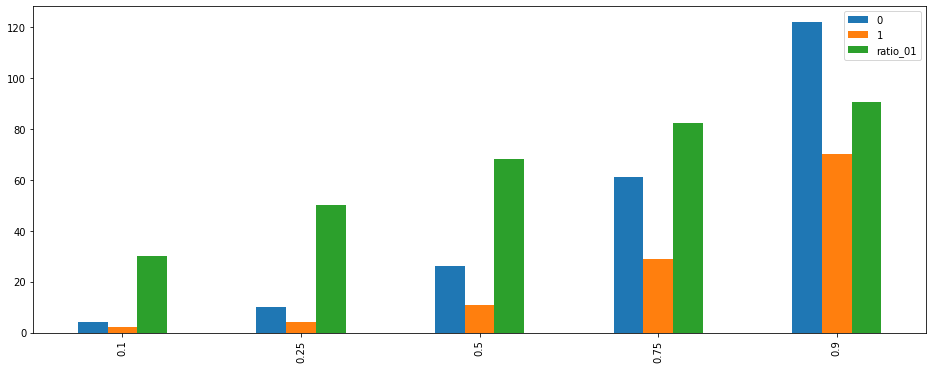

In [47]:
purchase_clnt_action_01.quantile([.1, .25, .5, .75, .9]).drop("clnt_id", axis=1).plot(kind = "bar", figsize= (16,6))

In [50]:
# 4분위수
purchase_clnt_action_01.quantile([.25, .5, .75])

,clnt_id,0,1,ratio_01
0.25,21014.0,10.0,4.0,50.00
0.50,37853.0,26.0,11.0,68.29
0.75,55655.5,61.0,29.0,82.35


In [69]:
# 0과 1 비율 25%, 50%, 75% 기준으로 그룹 1~4로 나눔
purchase_clnt_action_01['group'] = purchase_clnt_action_01['ratio_01'].apply(lambda x: 1 if x<25 else (2 if x<50 else (3 if x<75 else 4)))
# purchase_clnt_df에 group 붙이기
purchase_clnt_df_01 = pd.merge(purchase_clnt_df, purchase_clnt_action_01[['clnt_id', 'group']], on='clnt_id', how='left')

## ------------

#### 한 session 내에서 (검색->구매)가 많은지 (목록보기->구매)가 많은지

## 2-2) 결제시도 이전 패턴

In [88]:
action_seq = pd.read_csv("./Data/action_seq_0.csv")

In [137]:
purchase_clnt_action_seq = action_seq[action_seq['clnt_id'].isin(purchase_clnt_list)].drop('Unnamed: 0', axis=1)

In [138]:
purchase_clnt_action_seq

,clnt_id,action_type
1,2,0 1 2 0 3 5 0 1 2 0 5 1 2 5 1 2 5 1 2 5 1 2 5 ...
8,9,3 5 1 2 5 1 2 5 1 2 5 1 2 5 3 5 1 2 5 0 3 0 3 ...
16,17,3 2 3 2 5 3 0 5 4 5 3 5 4 5 4 5 4 5 4 5 4 5 4 ...
23,24,3 5 4 5 0 3 0 3 0 1 2 0 2 0 3 2 5 1 2 5 4 5 4 ...
36,38,5 0 3 1 2 3 0 1 2 0 3 2 3 5 4 5 4 5 4 5 4 5 4 ...
...,...,...
72311,72342,2 1 2 5 3 2 5 2 1 2 5 6 2 1 2 1 2 1 2 0 2 5 2 ...
72342,72373,2 1 2 0 1 2 0 1 2 0 2 1 2 5 0 1 2 5 2 5 0 2 0 ...
72369,72400,2 1 2 1 2 1 2 1 2 1 2 1 2 0 2 5 3 5 2 1 2 5 2 ...
72384,72415,5 3 5 6 7 1 2 5 3 5 3 5 6 2 5 3 2 5 2 5 3 4 5 ...


In [161]:
# R에서 순차패턴분석(Python에는 없음)

## 2-3) 검색어 상위 10~20개 정도의 단어 혹은 이를 포함하는 단어를 검색해 본 적이 있는지

### 검색어 상위 20개 (전체 / 1회이상 구매자)

In [100]:
all_sech_kwd_value_counts = pd.DataFrame(data_merged[data_merged.action_type==0].sech_kwd.value_counts())
purchase_sech_kwd_value_counts = pd.DataFrame(purchase_clnt_df[purchase_clnt_df.action_type==0].sech_kwd.value_counts())

In [105]:
print("\tALL_CLNT\tPURCHASE_CLNT")
multi_table([all_sech_kwd_value_counts.head(20), purchase_sech_kwd_value_counts.head(20)])

	ALL_CLNT	PURCHASE_CLNT


,sech_kwd
우유,8985
두부,5210
계란,5039
생수,4283
수박,2694
라면,2583
오이,2493
콩나물,2481
쌀,2046
식빵,2007


### 구매기록 있는 clnt가 상위20개의 검색어해보았는가

In [110]:
purchase_clnt_df[purchase_clnt_df.sech_kwd.notnull()].action_type.value_counts()

0    339994
Name: action_type, dtype: int64

In [132]:
# 상위20 검색한 row 추출 (원검색어)
purchase_clnt_df[purchase_clnt_df.sech_kwd.isin(sech_kwd_20)].head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,min,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
234,2,18,1,0,A03,20190828,23:33,76106,NaN,생수,...,33,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
456,9,11,1,0,A03,20190729,16:41,422890,NaN,식빵,...,41,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN
457,9,11,2,0,A03,20190729,16:41,448139,NaN,우유,...,41,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN
510,9,23,9,0,A03,20190904,11:28,183467,NaN,우유,...,28,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN
512,9,23,11,0,A03,20190904,11:28,198316,NaN,식빵,...,28,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN


In [126]:
# str.contains 쓰기 위해 | 추가한 형태 만들어주기
sech_kwd_20 = list(all_sech_kwd_value_counts.head(20).index.values)
sech_str = '|'.join(sech_kwd_20)
sech_str

'우유|두부|계란|생수|수박|라면|오이|콩나물|쌀|식빵|어묵|양파|과자|바나나|당근|상추|삼겹살|햇반|요구르트|복숭아'

In [139]:
# 상위20 검색한 row 추출 (원검색어 포함된 검색어 ex: 우유200ml)
purchase_clnt_df[purchase_clnt_df.sech_kwd.str.contains(sech_str)==True].head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,min,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
178,2,12,1,0,A03,20190812,15:26,67202,NaN,우유200,...,26,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
179,2,13,1,0,A03,20190812,16:15,0,NaN,우유200ml,...,15,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
234,2,18,1,0,A03,20190828,23:33,76106,NaN,생수,...,33,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
238,2,19,4,0,A03,20190830,21:49,1587107,NaN,진라면,...,49,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
241,2,19,7,0,A03,20190830,21:56,1963207,NaN,진라면,...,56,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN


-> 계란, 양파 등의 원검색어를 이용한 사람과 우유200ml, 진라면 등의 특정 상품/상품명을 이용한 사람의 구매율 차이 ?

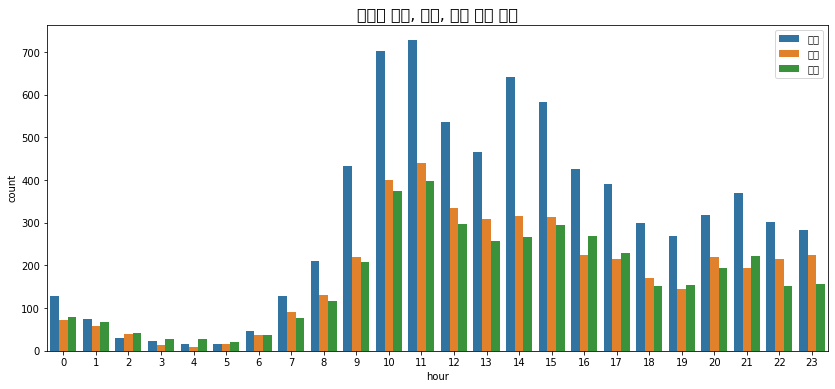

In [136]:
# 상위3개 검색어(우유, 두부, 계란)의 시간별 검색 분포
purchase_clnt_sech_top3 = purchase_clnt_df[purchase_clnt_df.sech_kwd.isin(['우유','두부','계란'])]
plt.figure(figsize= (14,6))
sns.countplot(purchase_clnt_sech_top3.hour, hue = purchase_clnt_sech_top3.sech_kwd)
plt.title("시간별 우유, 두부, 계란 검색 분포", fontsize = 16)
pl0t.legend()

### 1회이상 구매자 / 0회구매자의 각 검색키워드에 대한 검색율(한 번이라도 검색해 본 사람)

In [151]:
action_counts_by_clnt_id_g2 = action_counts_by_clnt_id[action_counts_by_clnt_id.iloc[:,7] == 0]
no_purchase_clnt_list = list(action_counts_by_clnt_id_g2.clnt_id)
no_purchase_clnt_df = data_merged[data_merged['clnt_id'].isin(no_purchase_clnt_list)]

In [153]:
g1_search_ratio = [] # purchase group
g2_search_ratio = [] # no purchase group
for kwd in sech_kwd_20:
    g1_all_clnt_num = purchase_clnt_df.clnt_id.value_counts().shape[0]
    g1_sech_clnt_num = purchase_clnt_df[purchase_clnt_df.sech_kwd.str.contains(kwd)==True].clnt_id.value_counts().shape[0]
    g1_search_ratio.append(round(g1_sech_clnt_num / g1_all_clnt_num * 100,2))
    g2_all_clnt_num = no_purchase_clnt_df.clnt_id.value_counts().shape[0]
    g2_sech_clnt_num = no_purchase_clnt_df[no_purchase_clnt_df.sech_kwd.str.contains(kwd)==True].clnt_id.value_counts().shape[0]
    g2_search_ratio.append(round(g2_sech_clnt_num / g2_all_clnt_num * 100,2))

In [160]:
sech_kwd_20_df = all_sech_kwd_value_counts.head(20)
sech_kwd_20_df["g1_ratio"] = g1_search_ratio
sech_kwd_20_df["g2_ratio"] = g2_search_ratio
sech_kwd_20_df
# sech_kwd는 한 clnt가 같은 kwd 여러번 검색한 것도 counting되지만,
# ratio는 검색해본 사람의 비율

C:\Users\sxsx1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sxsx1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sech_kwd,g1_ratio,g2_ratio
우유,8985,36.76,1.91
두부,5210,27.39,0.94
계란,5039,24.67,1.09
생수,4283,17.81,1.15
수박,2694,10.85,0.54
라면,2583,27.03,1.21
오이,2493,14.31,0.41
콩나물,2481,13.71,0.33
쌀,2046,23.11,1.61
식빵,2007,10.12,0.33


In [ ]:
# 한 세션 내에서 검색(0)하고 구매(6)했을 때, 검색어 무엇이었는지